In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
#data = work.updated_world_indices(category = 'Major', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]

In [7]:
#rawdata.to_excel('rawdata.xlsx', sheet_name='Equities')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  12<sup>th</sup> September, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

# World Equity Markets Heatmap

In [8]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def world_map(timeperiod):
    """
    """
    iso = pd.read_excel('World_Indices_List.xlsx', sheet_name='iso')
    iso.set_index('Country', inplace=True)
    rawdata
    data2 = rawdata.merge(iso['iso_alpha'], on='Country')
    data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']] = data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']].round(4)*100

    df = data2
    for col in df.columns:
        df[col] = df[col].astype(str)

    df['text'] = 'Return: '+df[timeperiod]+'%' + '<br>' \
                  'Country: '+ df['Country'] + '<br>' \

    fig1 = go.Figure(data=go.Choropleth(locations=df['iso_alpha'], z=df[timeperiod].astype(float).round(2), colorscale='RdYlGn', autocolorscale=False,
        text=df['text'], colorbar_ticksuffix = '%', colorbar_title = "Return"))



    return fig1.update_layout(width=950, height=500, margin=dict(l=0,r=0,b=0,t=0,pad=1),
                        xaxis=dict(scaleanchor='x', constrain='domain'), coloraxis_colorbar_x=1)

style = {'description_width': 'initial'}
interact(world_map,
             timeperiod = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Return Category: '));

interactive(children=(Dropdown(description='Return Category: ', index=2, options=(('Weekly LCL Returns', 'Chg …

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [9]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

In [10]:
def perf(tf):
    rawdata1 = rawdata.sort_values(by=tf, ascending=False)
    weekly_usd = rawdata1
    weekly_usd = ((pd.DataFrame(weekly_usd[tf]*100)).dropna().sort_values(by=tf, ascending=False))
    fig = px.bar(weekly_usd, color=weekly_usd.values, text=rawdata1['Country'], color_continuous_scale='rdylgn')

    fig.update_layout(title = 'World Indices Performance (%) in US Dollar Terms (EOD)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#282828"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x', width=1200, height=600)
    fig.update_traces(hovertemplate='Index: %{x} <br>Country: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf,
             tf = widgets.Dropdown(options=(('Weekly USD','$ Chg (%)'),('YTD USD','$ Chg YTD (%)')),
                                                   value = '$ Chg (%)', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=(('Weekly USD', '$ Chg (%)'), ('YTD USD', '$…

**HIGHLIGHTS**:

-  The selling pressure surrounding **US** stocks extended to this week, leading major indexes to plunge sharply. The Dow Jones was down by 2.7% compared to last Thursday while the broader S&P 500 index lost 2.51% and NASDAQ was the worst performer with a 4.07% WOW losses. This comes after investors dumped tech stocks after the rally since late March. On Thursday, the ECB kept its key interest rates unchanged and maintained all of its stimulus program. It reaffirmed its accomodative stance and said that the balance of risks remained tilted on the downside. It said it would monitor the recent appreciation of the euro but stressed that it did not target exchange rate level.


- AstraZeneca announced a ‘pause’ in their Phase III clinical trial to investigate a potential adverse reaction. While disappointing, it is important to remember that late stage trials are designed to assess the safety and effectiveness of a vaccine across a large, diverse population. A ‘pause’ is not unusual in trials and there is a reasonable probability that after an independent safety review, the trial will resume in the next week or so.


- **[Earnings Scorecard](https://www.factset.com/hubfs/Resources%20Section/Research%20Desk/Earnings%20Insight/EarningsInsight_091120.pdf)**: For Q2 2020 (with 100% of the companies in the S&P 500 reporting actual results), 84% of S&P 500 companies reported a positive EPS surprise and 65% reported a positive revenue surprise. The second quarter marked the highest percentage of S&P 500 companies reporting a positive EPS surprise since FactSet began tracking this metric in 2008. 


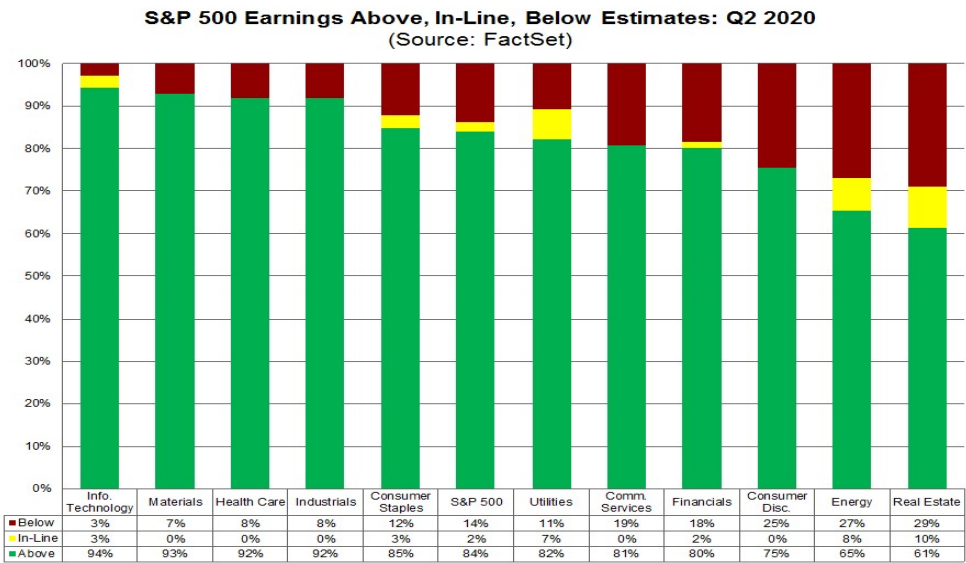
Source: FactSet

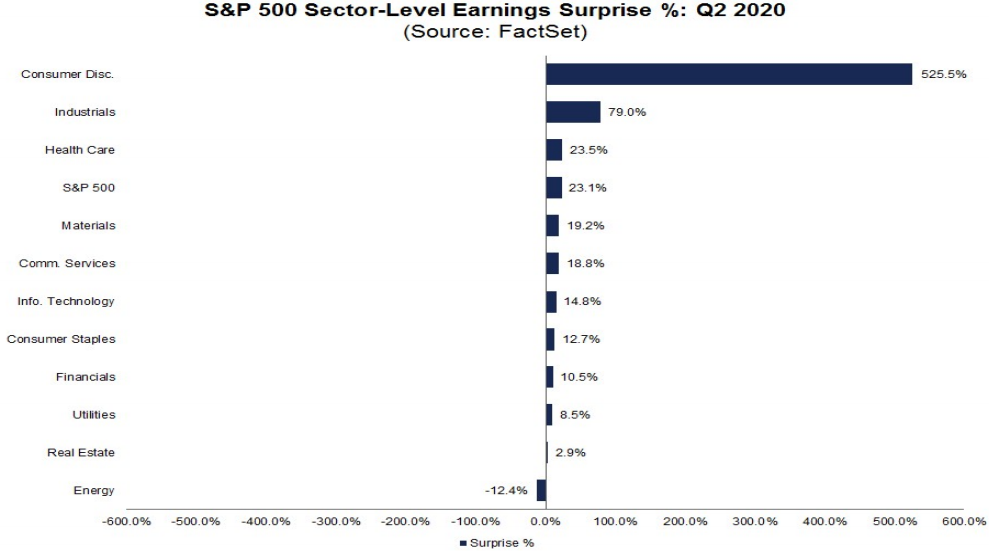

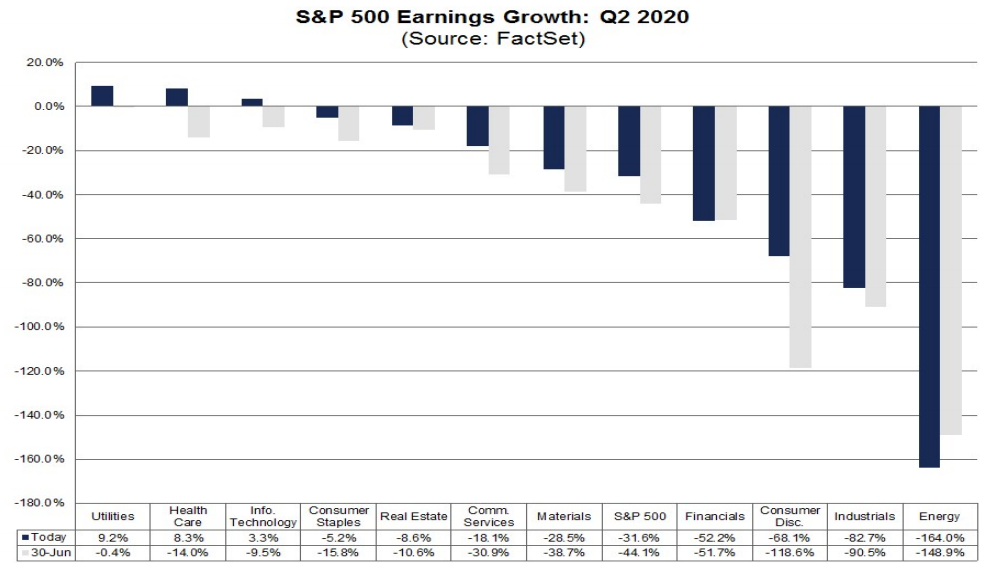

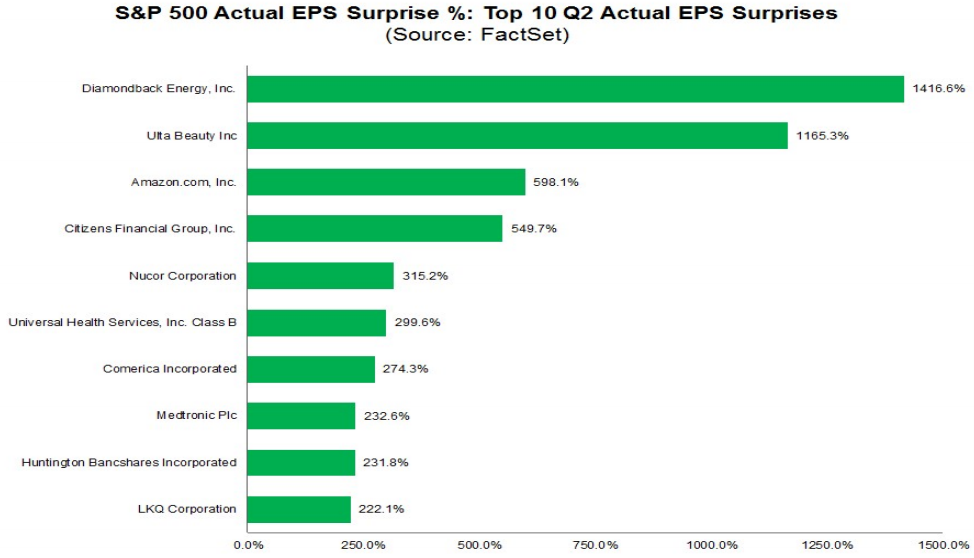

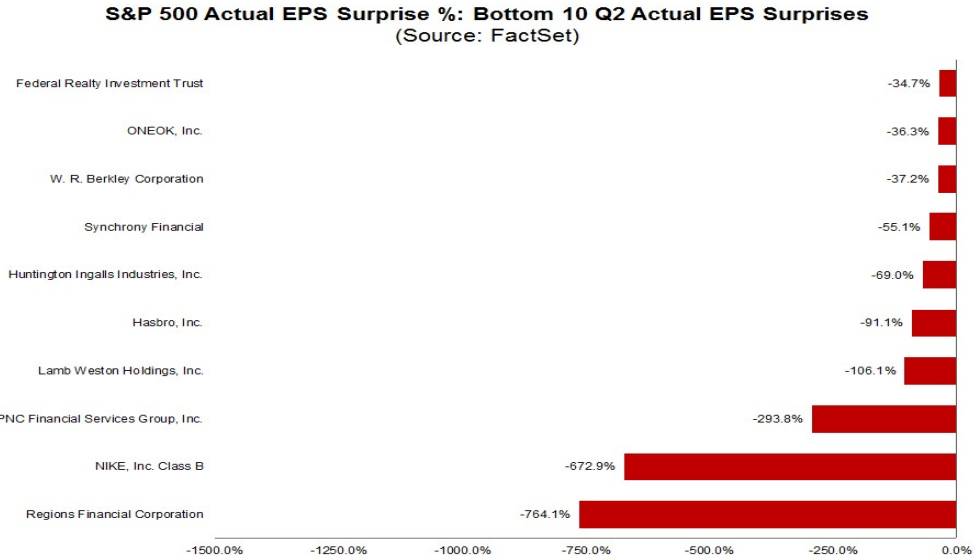

- **Mexico**’s IPC gained 154 points or 0.4% to 36,335 on Friday, as domestic economic data beat expectations. On the macro side, INEGI reported that industrial production continued to recover in July and expanded 6.9% on a monthly basis, with manufacturing activity soaring 11%. Also, ANTAD same-store retail sales declined only 3% on an annual basis, extending its recovery after plunging 22.9% in March. During the week, the IPC lost 0.3%.


- **Brazil**’s Ibovespa lost 471 points or 0.5% to 98,363 to extend losses, as the tech sell-off softened. On Friday, IBGE data showed the services sector expanded 2.6% mom in July, below a preliminary reading of a 5% increase and below expectations of a 3.1% rise. On the corporate front, Vale shares rose 5.4% in the NYSE after the mining company approved paying compensation to its shareholders. During the week, the Ibovespa lost 2.8%.


- **Canada**’s TSX gained 37 points or 0.2% to 16,222 on Friday, as the US tech rout continued at a softer pace. On the policy side, the governor of the Bank of Canada warned on Thursday that the slower rebound faced by women, youth and low-wage workers could pose a threat to the economic recovery. On the macro side, data showed Canadian industries operated at 70.3% of their production capacity Q2, its lowest rate since the Q1 1987. During the session, gold prices declined 0.7% to 1950 per ounce, while WTI crude oil prices gained 0.5% to USD 37.5 per barrel. During the week, the TSX was little changed.


- The CAC 40 (**France**) gained 1.4% to 5,034 during the latest week, rebounding from a 0.8% gain in the previous period, propelled by hopes for global economic recovery and prospects of coronavirus vaccines and treatments. On Monday, French Sanofi said the vaccine it is developing with Britain's GlaxoSmithKline will likely cost less than €10. At the same time, investors tried to shrug off tech valuation concerns. For Friday only, the CAC 40 rose 10 points, or 0.2% to 5,034, after a 0.3% fall on Thursday. On the corporate front, Louis Vuitton blamed Tiffany for mismanagement during the pandemic and because of that the USD 16.2 billion was no longer valid.


- The **UK** FTSE 100 gained 29 points, or 0.5% to end at 6,032 on Friday, on the back of a weaker pound amid concerns that Britain will end its post-Brexit transition period without a trade agreement. The EU urged the UK to back down on plans to override the Withdrawal Agreement "by the end of the month" or risk jeopardising trade talks. Post-Brexit trade deal talks are set to continue next week. On the economic data front, monthly GDP and industrial production figures continue to point to a slow recovery from the pandemic. On the corporate front, Rio Tinto CEO quit after backlash over the destruction of an ancient Aboriginal site in Western Australia. For the week, the index rose 4%, its first weekly gain in a month.


- The S&P BSE **SENSEX** closed near the flat line at 38,855 on Friday, as an agreement between New Delhi and Beijing offset the impact from the US tech sell-off. In a joint statement China and India said they reached a five-point consensus, including agreements that troops from both sides should quickly disengage to ease tensions on their contested Himalayan border and take steps to restore “peace and tranquillity”. For the week, the index gained 1.3% led by Reliance Industries shares on the back of reports of potential investments from Middle East funds and Amazon.com Inc in its retail arm.


- Data were fairly limited this week. In the US, initial jobless claims which came in at 884k last week, indicating that the recovery back to pre-pandemic level is still long way to go. PPI inflation eased to 0.3% MOM. Small business optimism index improved in August as firms plan to hire more workers and increase capex. Eurozone latest GDP growth was revised higher; the Sentix Investor Confidence Index rose to -8 in September, a sign of less pessimistic outlook among investors. 


- UK house prices gained further according to RICS survey indicating robust recovery in the housing market. Japan data were mixed as GDP was revised lower, both household spending and wages continued to fall but core machine orders (capex gauge) rebounded. China trade surplus narrowed slightly in August, but surplus with the US widened. Consumer inflation and factory deflation eased. Australia business and consumer confidence both improved and home loan approvals surged. New Zealand retail card spending declined and its manufacturing PMI fell sharply but still above 50.
 

- Industrial production in **India** shrank 10.4 percent year-on-year in July of 2020, following a downwardly revised 15.8 percent fall in June and compared to forecasts of an 11.5 percent drop. It marks the fifth straight month of falling industrial output due to the coronavirus pandemic and a prolonged lockdown. Manufacturing went down 11.1 percent, mining sank 13 percent and electricity output declined 2.5 percent. Considering April to July, industrial output plunged 29.2 percent. 
 
 
- Next week’s calendar is filled with a barrage of economic data. Monday’s data flow is light as usual and limited to New Zealand services PMI, Japan industrial production and Eurozone industrial production. The RBA is publishing its latest meeting minute, but market attention is likely on China’s monthly key indicators - industrial production, retail sales and fixed assets investment on Tuesday. This is then followed by the UK job report, Germany ZEW Survey, and US industrial production data at night.


- Wednesday kicks off with Japan’s trade data, followed by Australia Westpac Leading Index. UK CPI, Eurozone trade, US retail sales and NAHB Housing Market Index was also in the pipeline. Thursday looks to be a busy day full of central bank meeting as the Fed, BOE and BOJ all scheduled to announce their latest monetary policy decisions on the same day. The data scheduled for Thursday release are also top-tiered, they include New Zealand GDP, Singapore NODX, Australia job data, as well as US homebuilding data. Last but not least, Japan CPI, UK retail sales, leading Index and University of Sentiment Index are slated to be released on Friday.

[Back to Table of Contents](#content)

<a id ="fi"></a>
## Fixed Income

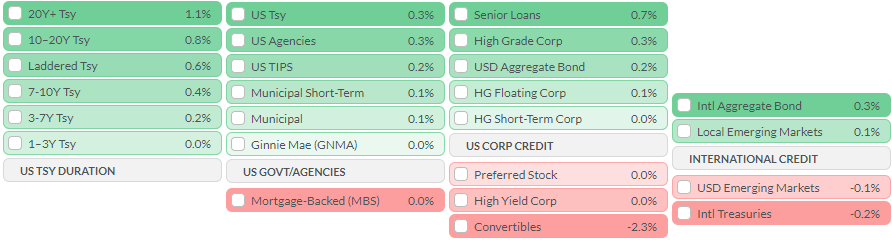

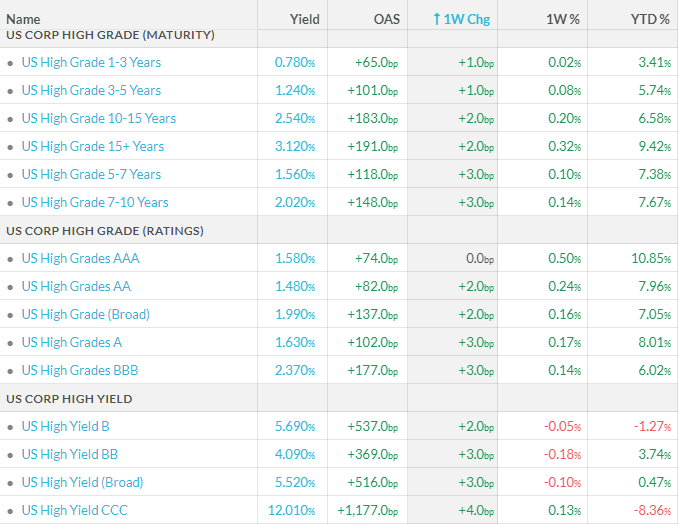

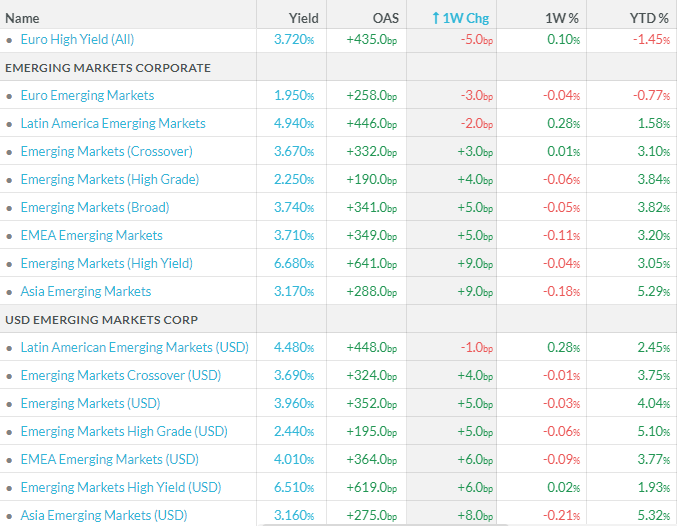

**HIGHLIGHTS:**

- The week under review saw US Treasuries end weaker due to better-thanexpected economic data marked by some cheer in NFP jobs numbers and some knock-on effect from volatile equitiy movements on Wall Street. Overall benchmark yields rose between 1-6bps with the curve bear-steepening sharply; with the longer-ends pressured the most. The 2Y benchmark; reflective of interest rate predictions edged 1bps up at 0.14% whilst the muchwatched 10Y (which traded within a narrower 0.63%-0.72% range); succumbed 4bps at 0.68%. 


- Of the three(3) auctions involving record sizes of USD 50bn of 3Y, USD 35bn 10Y and USD 23bn 30Y bonds; only the 30Y auction saw decent bidding metrics. The Fed’s holdings of UST’s rose by ~USD 28bn; the most in 3 months to USD 4.4 trillion. The long-end of the curve has been sensitive to increases in supply and may continue to be impacted by auctions going forward. Expect bond traders to react to switches in asset classes with equities sentiment possibly playing a prominent part of their trading decision next week.


- On a tactical basis, market moves suggests dollar to remain neutral against G10 currencies rather than overtly bearish. This non-consensus outlook has three main fundamental drivers. First, US dollar weakening has led to a change in financial condition indices in the US compared to the eurozone, with US financial conditions now as easy as they have been in the last decade, whereas conditions remain tighter in Europe thanks to a strong euro. 


- Second, the US is no longer a negative outlier with regards to Covid-19 cases, with US infections declining compared to a rise in cases across Europe. Third, the announcement by the Federal Reserve (the Fed) that it will target average inflation levels has reinforced its dovish stance, although recent announcements from other central banks have re-affirmed a similar bias to further easing. In recent weeks the Bank of England and Reserve Bank of Australia have said they will ease monetary policy further if needed. Meanwhile, with deflation returning to the eurozone (the latest harmonised index of consumer prices print showed a 0.2% year-on-year decline), European Central Bank officials are starting to fret about currency strength. Ultimately, there is now less divergence in the stance of central banks.


**US dollar weakening has led to different financial conditions across regions**

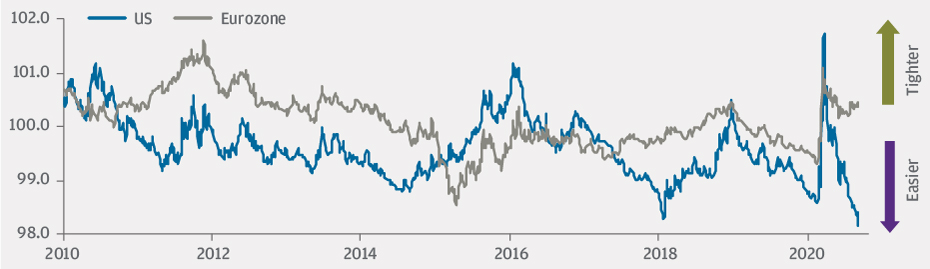

Source: Bloomberg (GSUSFCI Index, GSEAFCI Index); data as of 4 September 2020.


- An **Indonesian** bond auction Tuesday drew the fewest bids since April, signaling investor unease about the nation’s plan to rely more heavily on the central bank to fund the budget deficit. Thailand’s current monetary policy is accommodative enough and further interest-rate cuts would be less effective in reviving the economy from its pandemic-driven downturn, the outgoing central bank governor said.


- The **Philippine** central bank can buy more government debt from the Bureau of the Treasury with a longer repayment period, based on a proposed law awaiting President Rodrigo Duterte’s approval. The central bank is considering selling its excess gold holdings, Governor Benjamin Diokno said. The Philippine government is set to pay its 300-billion peso (USD 6 billion) debt to the central bank by the end of this month, Treasurer Rosalia de Leon said.


- Philippine borrowers are looking to raise fewer bonds overseas in the coming months, taking away a pillar of strength for the peso. Philippine companies are poised to sell an unprecedented amount of local debt, joining a global flood of fund-raising. The central bank will begin selling its own securities in the coming week.


- **South Africa**’s current-account balance swung to a wider-than-expected deficit in the second quarter as a lockdown restricted exports and closed down the tourism industry. Business confidence unexpectedly recovered in the third quarter to levels last seen before the coronavirus and restrictions to curb its spread. Foreign holdings of South African government bonds fell below 30% for the first time since 2012.


- **Mexico**’s proposed 2021 budget contains no significant spending increases, but rather a plan to cut debt, as the government rejects calls for fiscal stimulus to dig the economy out of the worst slump since the 1930s. Mexico turned its forecast for a primary deficit into a surplus this year, Deputy Finance Minister Gabriel Yorio said. Consumer prices rose 4.05% in August from a year ago, above the upper limit of the central bank’s target for the first time in 15 months. Industrial production contracted 11.3% in July y/y vs. est. -12.9%. Mexico is unlikely to lose its investment grade rating in the medium term, Moody’s sovereign analyst Ariane Ortiz-Bollin said.


-  **Colombia, home to the best-performing local bonds in the developing world**, sold 4.8 trillion pesos (USD 1.29 billion) of its longest ever peso-denominated notes. Violent protests against police brutality that started in Bogota spread across Colombia on Thursday in a second night of chaos.


- **Argentine** President Alberto Fernandez is shifting funds from a district governed by a political rival to help an ally in another sign of growing political tension with the opposition. **Fitch upgraded Argentina to CCC**. The International Monetary Fund hasn’t set a date for a mission to Argentina as yet, but discussions with local authorities are taking place online, said Gerry Rice, the fund’s communications director.

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [71]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [72]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [73]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

### Top Currencies Live Cross Rates

In [74]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/forex-cross-rates/" rel="noopener" target="_blank"><span class="blue-text">Forex Rates</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-forex-cross-rates.js" async>
  {
  "width": 770,
  "height": 400,
  "currencies": [
    "EUR",
    "USD",
    "JPY",
    "GBP",
    "CHF",
    "AUD",
    "CAD",
    "NZD",
    "CNY"
  ],
  "isTransparent": false,
  "colorTheme": "light",
  "locale": "en"
}
  </script>
</div>
<!-- TradingView Widget END -->
""")

In [75]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**

> Trump vowed to decouple US economy from China, and threatened ban on cotton products from Xinjiang. AstraZeneca paused COVID-19 vaccine trials after a volunteer developed unexplained illness. Jakarta plans to reimpose partial lockdown as hospitals come under pressure. Amidst the risk-off backdrop, DXY gain steadily during the first half of the week but was wiped out within 1 session by EUR strength. It has recovered partially and currently hovers at 93.27.


> **BOC kept rates unchanged, but commented that CAD’s level will be taken into account in policy setting**, and also highlighted flexibility in adjusting pace of QE. ECB stated that exchange rate is not a target of monetary policy, suggesting that they will not act to curb the recent EUR strength. The controversial UK Internal Market Bill proposed by Johnson’s government aims to protect job, trade, and power within the UK but breaks the terms of international treaties, raising concerns on UK’s reputation as a trustworthy trading partner. **GBP comes under pressure as markets price in a greater chance of a no-deal Brexit, making it the worst performer of the week**. Up next week we have FOMC, BOJ and BOE.


- **USD:** : The dollar has strengthened for the second consecutive week, continuing its September streak. DXY was up 0.57% WOW up till Friday, with a high of 93.662 on 9 September. USD gained against most G10 currencies (except JPY) and some EM currencies (TRY, BRL, IDR). This comes as US markets weakened. We observed some progress on labour market data (NFP, initial jobless claims), but it remains a long road towards normality.


- **EUR**: EUR/USD eased to a low of 1.1753 on 9 September but surged to a high of 1.1917 on 10 September. Pair was on a bid tone on Friday around 1.184 levels. This came after ECB policy decision (no change), and chief Christine Lagarde signalling comfort in inflation and FX trends for now. Pick of next week’s data is on industrial production that will be released on 14 September.


- **GBP**: GBP/USD underperformed and fell by almost 3.42% WOW. This was brought about by global market risk aversion but also domestic Brexit news. EU is considering taking legal action over the UK’s plans to breach prior Brexit agreements, increasing risk of a hard Brexit on the UK. Brexit and talks with the US may remain as dampener for the pound, particularly if there is sustained attrition. Being a smaller and open economy, the UK is vulnerable to global downside risks. Markets will likely focus attention on Bank of England policy decision on 17 September.


- **JPY**: USD/JPY stayed range bound in an environment of dollar strength. This was mostly between 105.80-106.39 for the week. Bank of Japan announces monetary policy decision on 17 September. Markets will likely remain focused on Japan’s ruling party LDP leadership race and secondarily on Bank of Japan. 


- **AUD**: AUD/USD was mostly range bound for the week, despite some vulnerability on the downside (e.g. low of 0.7192 on 9 September). RBA minutes out on 15 September may not shape AUD if there are no surprises, but employment figures released on 17 September may trigger some weakness if there are some disappointments.


- **MXN**: The Mexican peso was trading higher at 21.3 against the USD on Friday, close to near six-week high reached in the previous session, after data showed industrial production rose 6.9% over a month earlier in July beating market expectations of a 6.6% gain. Earlier this week, Mexico’s government unveiled its 2021 budget with limited infrastructure spending and tight debt targets.

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [78]:
#comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [79]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

#def comd_data(commodity):
#    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
#    df = pd.DataFrame(df)
#    df.columns = [commodity]
#    return df

#df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
#df.index.name='Date'

#for i in range(len(comds)):
#    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

#df = df.ffill().dropna()
#df.to_excel('comd1.xlsx')

In [80]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [81]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()

In [82]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [83]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h', color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).dropna().sort_values(by='Chg YTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{y} <br>Return: %{x:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS**

> The Bloomberg Commodity Index traded lower for a second week with lower risk appetite, as seen through the setbacks among U.S. megacap stocks, combined with a dollar that has stopped falling, rising coronavirus cases and concerns about the timing of a vaccine all playing a part. Crude oil and fuel products took a hit on weakening fundamentals, becoming the worst performers for the week. Precious metals continued to consolidate with platinum the best performing metal on the week.


- **Brent Crude** fell 0.6% to settle at USD 39.83 a barrel on Friday, posting its second weekly loss of 6.6% the largest since June, amid concerns over fuel demand recovery as the number of coronavirus infections continue to rise worldwide. Also, a surprise rise in US crude stockpiles in the latest week weighted on sentiment. The EIA reported a rise of 2.032 million barrels in US crude stockpiles in the latest week, in line with the API data which showed a build of 3 million barrels.The market has been under pressure all week starting with Saudi Arabia’s surprise move to cut prices on oil it supplies to Asia by USD 1.00 starting in October.


- **Platinum**: At the top of the table this week we find platinum, which normally operates in gold’s shade. In their latest quarterly update the World Platinum Investment Council (WPIC) revised their 2020 outlook from a surplus to deficit. In it, they explain the changes caused by the pandemic which have reduced access to recycled material as well as supplies from South Africa, the world’s biggest producer - adding to heightened global risk which they expect will continue to drive investor demand for hard assets.


- From an investment perspective, platinum’s biggest challenge remains its lack of liquidity, being a much smaller market than gold. This is one of the likely reasons why it, despite an improved outlook, has seen a muted demand from asset managers who operate in sizes which platinum would struggle to manage.


- **Copper** prices dropped to a one-week low on Friday, setting the LME benchmark on track for its first weekly loss in five, as the U.S. dollar rebounded. Copper's pullback also tracked data that showed LME inventories of the metal ticking higher on Thursday. China’s copper scrap imports are expected to drop around 50% this year, an official from the China Nonferrous Metals Industry Association’s CMRA recycling branch said. India plans to raise surveillance of copper and aluminium imports while developing policies to curb shipments from China and other Asian nations.


- **Nickel**: [Tesla is in discussions with Canadian miner Giga Metals](https://www.reuters.com/article/tesla-giga-metals-nickel/exclusive-tesla-in-talks-to-buy-low-carbon-nickel-from-canada-sources-idINL8N2FF6ZP) about helping to develop a large mine that would give the electric carmaker access to low carbon nickel for its batteries, three sources familiar with the matter said.Forecasts from Benchmark Mineral Intelligence suggest nickel demand for batteries will rise to 1.4 million tonnes in 2030, or 30% of total nickel demand, from around 139,000 tonnes and 6% respectively this year, as sales of electric vehicles soar.


- **Gold** prices fell 0.7% to settle at USD 1,940 an ounce on Friday, on profit-taking and on a lack of further stimulus from the US government and the ECB. Still, for the week the metal notched its second weekly gain amid concerns over the global economic recovery as the number of coronavirus infections continue to rise. Gold has gained about 28% so far this year, helped by ultra-loose monetary policy adopted by major central banks around the world.

[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

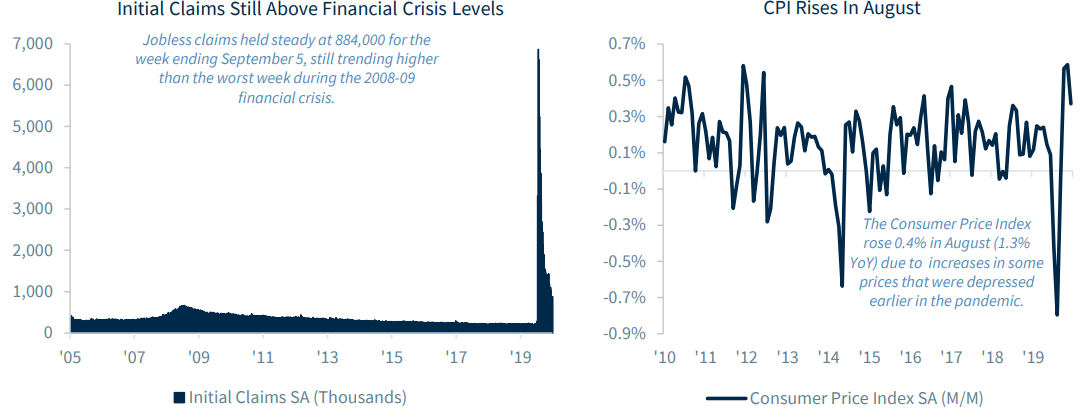

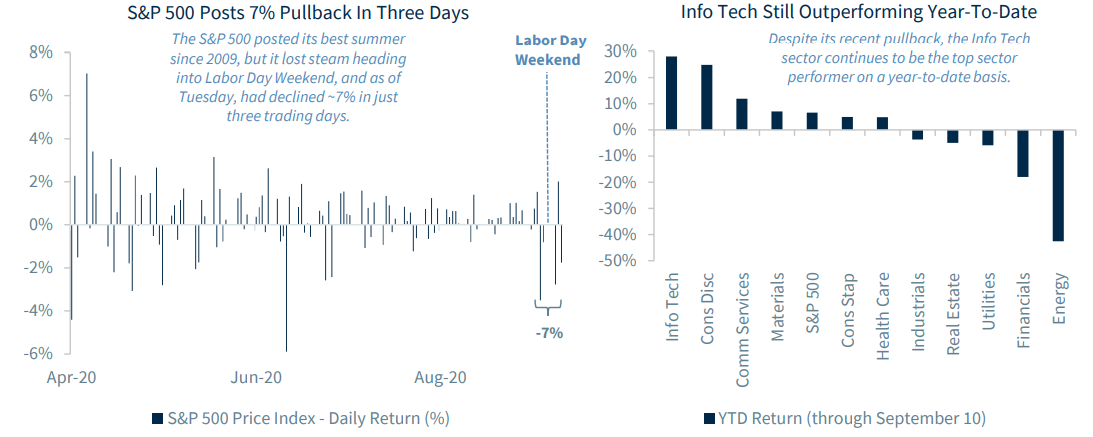

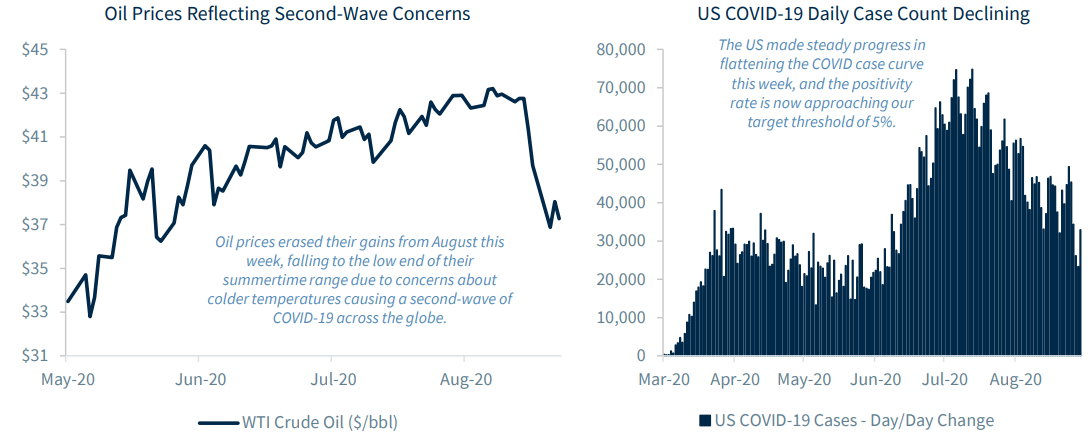

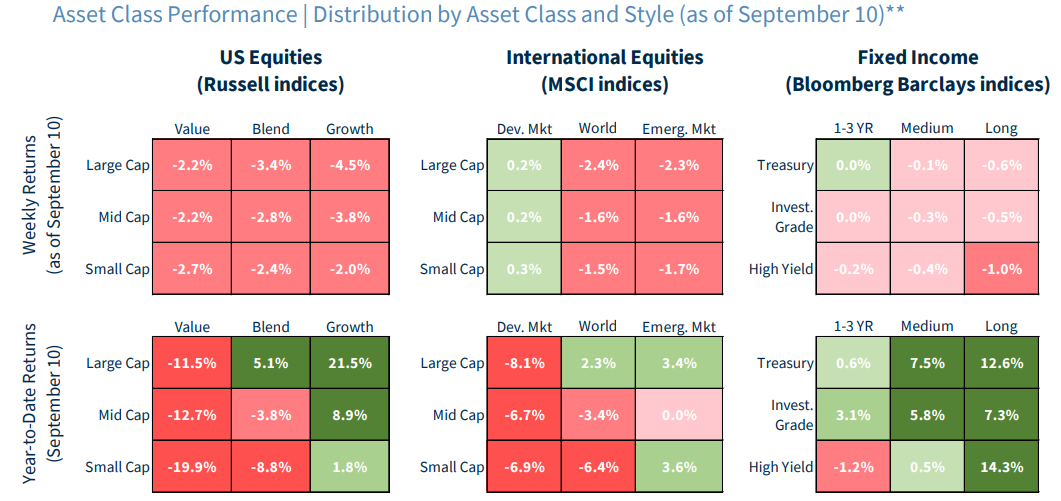

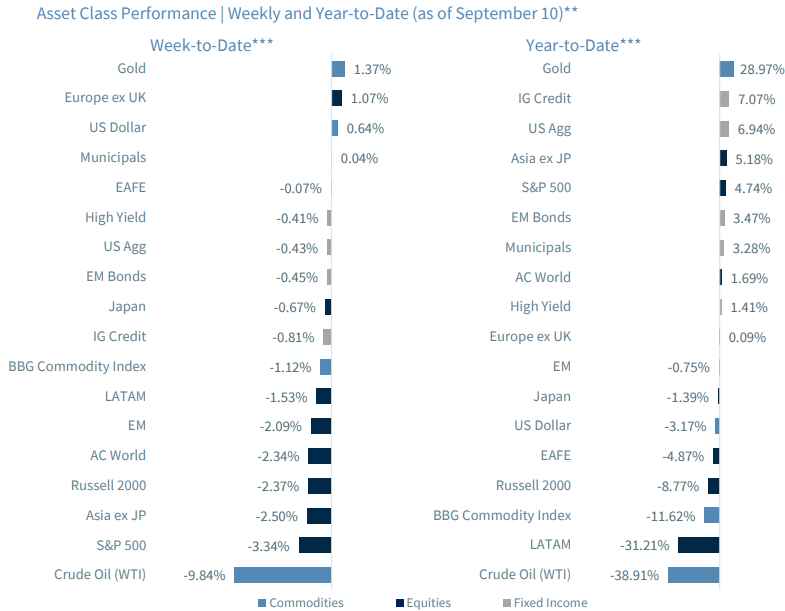

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [84]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)